<a href="https://colab.research.google.com/github/paulo-batista/Machine-Learning-Algorithms/blob/master/NLP_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vinicius Caridá - TensorFlow User Group São Paulo

# Código da apresentação de NLP

In [ ]:
#%%capture
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!python -m spacy download en
!pip install gensim==3.5.0
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.1/805.1 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


2023-08-19 02:16:43.193273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-19 02:16:44.473458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 24.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2023-08-19 02:17:01.781428: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-19 02:17:03.723587: W tensorflow/compiler/tf2tensorrt/utils/py

## DCOCUMENTO / CORPUS

In [ ]:
import pandas as pd

# Documento e Corpus
df = pd.DataFrame({
    'text': [
      'Sobre live de Keras no TFUG? Eu gostei muito',
      'A live de Keras pode melhorar, não gostei muito'
    ],
    'class': [
        'positivo',
        'negativo'
    ]})

df.head()

,text,class
0,Sobre live de Keras no TFUG? Eu gostei muito,positivo
1,"A live de Keras pode melhorar, não gostei muito",negativo


## TOKENIZAÇÃO

In [ ]:
# aplica em uma string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

nome = 'TensorFlow User Group São Paulo'

print(word_tokenize(nome))
print(nome.split(' '))

['TensorFlow', 'User', 'Group', 'São', 'Paulo']
['TensorFlow', 'User', 'Group', 'São', 'Paulo']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Aplica em uma lista
texto = ['TensorFlow User Group São Paulo','um dois, três! Papa São Pedro']
type(texto)

# usando o split
print(texto[1].split())
[t.split() for t in texto]

['um', 'dois,', 'três!', 'Papa', 'São', 'Pedro']


[['TensorFlow', 'User', 'Group', 'São', 'Paulo'],
 ['um', 'dois,', 'três!', 'Papa', 'São', 'Pedro']]

## STOPWORDS

In [ ]:
import nltk
nltk.download('stopwords')

stops = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# lista todas as stopwords
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# remove uma stopword da lista
stops.pop(3)

'myself'

In [ ]:
# podemos criar nossa propria lista
stops = stops + ["Keras"]

In [ ]:
# Aplicando a utilização das stopwords
from sklearn.feature_extraction.text import CountVectorizer

stops = nltk.corpus.stopwords.words('portuguese') + ["keras"]

vect = CountVectorizer(ngram_range=(1,1), stop_words=stops)
vect.fit(df.text)
text_vect = vect.transform(df.text)

print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).T.to_string())

          0  1
gostei    1  1
live      1  1
melhorar  0  1
pode      0  1
sobre     1  0
tfug      1  0


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(nltk.corpus.stopwords.words('portuguese')[:10])

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as']


In [ ]:
len(stops)

208

## Stemmer (Stemização)

In [ ]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
exemplos = ["connection","connections","connective","connecting","connected"]
print(exemplos)

for word in exemplos:
  print(ps.stem(word))

['connection', 'connections', 'connective', 'connecting', 'connected']
connect
connect
connect
connect
connect


In [ ]:
# Stemização
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk
nltk.download('rslp')

doc = ["pedra","pedreira","pedreiro", "pedregulho", "pedrada"]
print(doc)

ps = PorterStemmer()
rslp = RSLPStemmer()

for word in doc:
    print(ps.stem(word), ' - ', rslp.stem(word))

['pedra', 'pedreira', 'pedreiro', 'pedregulho', 'pedrada']
pedra  -  pedr
pedreira  -  pedr
pedreiro  -  pedr
pedregulho  -  pedregulh
pedrada  -  pedr


[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


In [ ]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['tokens'] = df.text.apply(word_tokenize)
df['tokens']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    [Sobre, live, de, Keras, no, TFUG, ?, Eu, gost...
1    [A, live, de, Keras, pode, melhorar, ,, não, g...
Name: tokens, dtype: object

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem.rslp import RSLPStemmer
import nltk
nltk.download('rslp')

tokens = df.tokens[0]
tokens = tokens + df.tokens[1]

ps = PorterStemmer()
rslp = RSLPStemmer()

for tok in tokens:
  #print('Original: %s \t\t  PorterStemmer: %s \t\t RSLPStemmer: %s' % (tok, ps.stem(tok), rslp.stem(tok)))
  print(f'Original: {tok:{11}} PorterStemmer: {ps.stem(tok):{10}} RSLPStemmer: {rslp.stem(tok):{10}}')


Original: Sobre       PorterStemmer: sobr       RSLPStemmer: sobr      
Original: live        PorterStemmer: live       RSLPStemmer: liv       
Original: de          PorterStemmer: de         RSLPStemmer: de        
Original: Keras       PorterStemmer: kera       RSLPStemmer: ker       
Original: no          PorterStemmer: no         RSLPStemmer: no        
Original: TFUG        PorterStemmer: tfug       RSLPStemmer: tfug      
Original: ?           PorterStemmer: ?          RSLPStemmer: ?         
Original: Eu          PorterStemmer: eu         RSLPStemmer: eu        
Original: gostei      PorterStemmer: gostei     RSLPStemmer: gost      
Original: muito       PorterStemmer: muito      RSLPStemmer: muit      
Original: A           PorterStemmer: a          RSLPStemmer: a         
Original: live        PorterStemmer: live       RSLPStemmer: liv       
Original: de          PorterStemmer: de         RSLPStemmer: de        
Original: Keras       PorterStemmer: kera       RSLPStemmer: ker

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


## Lemmatizer (Lematização)

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

exemplos = ["connection","connections","connective","connecting","connected"]
wnl = WordNetLemmatizer()

for word in exemplos:
    print(wnl.lemmatize(word,"v"))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


connection
connections
connective
connect
connect


## UNIGRAMA

In [ ]:
df.text

0       Sobre live de Keras no TFUG? Eu gostei muito
1    A live de Keras pode melhorar, não gostei muito
Name: text, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df.text)
text_vect = vect.transform(df.text)

print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).to_string())

   de  eu  gostei  keras  live  melhorar  muito  no  não  pode  sobre  tfug
0   1   1       1      1     1         0      1   1    0     0      1     1
1   1   0       1      1     1         1      1   0    1     1      0     0


In [ ]:
text_vect

<2x12 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

## BIGRAMA

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(2,2))
vect.fit(df.text)
text_vect = vect.transform(df.text)

print(pd.DataFrame(text_vect.A, columns=vect.get_feature_names_out()).to_string())

   de keras  eu gostei  gostei muito  keras no  keras pode  live de  melhorar não  no tfug  não gostei  pode melhorar  sobre live  tfug eu
0         1          1             1         1           0        1             0        1           0              0           1        1
1         1          0             1         0           1        1             1        0           1              1           0        0


# REGEX

In [ ]:
email = "vfcarida@gmail.com"

In [ ]:
# função split do Python
email.split("@")[1].split(".")[0]

'gmail'

In [ ]:
# importa pacote de regular expression
import re

regex = r"(?<=@)[^.]+(?=\.)"
re.findall(regex, email)

['gmail']

## TF IDF

In [ ]:
import numpy as np

In [ ]:
a = "Essa é a primeira sentença".split()
b = "Aqui é a segunda Segunda sentença".split()
c = "E, por fim a segunda última frase".split()

In [ ]:
def tfidf(word):
    tf = []
    count_n = 0
    for sentence in [a, b, c]:
        # calculate TF
        t_count = len([x for x in sentence if x == word])
        tf.append(t_count/len(sentence))
        # count number of docs for IDF
        count_n += 1 if word in sentence else 0
    idf = np.log10(len([a, b, c]) / count_n)
    return [round(_tf*idf, 4) for _tf in tf]

# -------------------
word = 'a'
tfidf_a, tfidf_b, tfidf_c = tfidf(word)
print(f'TFIDF({word})')
print(f"TF-IDF a: {tfidf_a}\nTF-IDF b: {tfidf_b}\nTF-IDF c: {tfidf_c}\n")

# -------------------
word = 'segunda'
tfidf_a, tfidf_b, tfidf_c = tfidf(word)
print(f'TFIDF({word})')
print(f"TF-IDF a: {tfidf_a}\nTF-IDF b: {tfidf_b}\nTF-IDF c: {tfidf_c}\n")

TFIDF(a)
TF-IDF a: 0.0
TF-IDF b: 0.0
TF-IDF c: 0.0

TFIDF(segunda)
TF-IDF a: 0.0
TF-IDF b: 0.0293
TF-IDF c: 0.0252



In [ ]:
vocab = set(a+b+c)
print(vocab)

{'E,', 'Segunda', 'por', 'a', 'Aqui', 'frase', 'é', 'última', 'primeira', 'fim', 'segunda', 'sentença', 'Essa'}


In [ ]:
# initialize vectors
vec_a = []
vec_b = []
vec_c = []

for word in vocab:
    tfidf_a, tfidf_b, tfidf_c = tfidf(word)
    vec_a.append(tfidf_a)
    vec_b.append(tfidf_b)
    vec_c.append(tfidf_c)

In [ ]:
print(vec_a)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0352, 0.0, 0.0954, 0.0, 0.0, 0.0352, 0.0954]


In [ ]:
print(vec_b)

[0.0, 0.0795, 0.0, 0.0, 0.0795, 0.0, 0.0293, 0.0, 0.0, 0.0, 0.0293, 0.0293, 0.0]


In [ ]:
print(vec_c)

[0.0682, 0.0, 0.0682, 0.0, 0.0, 0.0682, 0.0, 0.0682, 0.0, 0.0682, 0.0252, 0.0, 0.0]


TF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer(ngram_range=(1,1), use_idf=False, norm='l1')
vect.fit(df.text)
tf_vect = vect.transform(df.text)

print(pd.DataFrame(tf_vect.A, columns=vect.get_feature_names_out()).T.to_string())

                 0      1
de        0.111111  0.125
eu        0.111111  0.000
gostei    0.111111  0.125
keras     0.111111  0.125
live      0.111111  0.125
melhorar  0.000000  0.125
muito     0.111111  0.125
no        0.111111  0.000
não       0.000000  0.125
pode      0.000000  0.125
sobre     0.111111  0.000
tfug      0.111111  0.000


TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect = TfidfVectorizer()
vect.fit(df.text)
tfidf_vect = vect.transform(df.text)

print(pd.DataFrame(tfidf_vect.A, columns=vect.get_feature_names_out()).T.to_string())

                 0         1
de        0.278409  0.302531
eu        0.391294  0.000000
gostei    0.278409  0.302531
keras     0.278409  0.302531
live      0.278409  0.302531
melhorar  0.000000  0.425196
muito     0.278409  0.302531
no        0.391294  0.000000
não       0.000000  0.425196
pode      0.000000  0.425196
sobre     0.391294  0.000000
tfug      0.391294  0.000000


## Similaridade tf-idf versus one hot

In [ ]:
# a) Essa é a primeira sentença
# b) Aqui é a segunda sentença
# c) E, por fim a última frase

# Vocabulario
#                'Aqui', 'E,',  'Essa',  'a',  'fim',    'frase',   'por',  'primeira',  'segunda',  'sentença',  'é',  'última'
bow_a = np.array([0,      0,       1,     1,     0,         0,        0,         1,          0,          1,        1,       0])
bow_b = np.array([1,      0,       0,     1,     0,         0,        0,         0,          1,          1,        1,       0])
bow_c = np.array([0,      1,       0,     1,     1,         1,        1,         0,          0,          0,        0,       1])

In [ ]:
# Similaridade BoW
from scipy.spatial import distance

BoW_vec_a_vec_b = 1 - distance.cosine(bow_a, bow_b)
BoW_vec_a_vec_c = 1 - distance.cosine(bow_a, bow_c)
BoW_vec_b_vec_c = 1 - distance.cosine(bow_b, bow_c)

print(f'similaridade bow vec_a_vec_b: {BoW_vec_a_vec_b :.3}')
print(f'similaridade bow vec_a_vec_c: {BoW_vec_a_vec_c :.3}')
print(f'similaridade bow vec_b_vec_c: {BoW_vec_b_vec_c :.3}')

similaridade bow vec_a_vec_b: 0.6
similaridade bow vec_a_vec_c: 0.183
similaridade bow vec_b_vec_c: 0.183


In [ ]:
# Similaridade tf-idf

sim_vec_a_vec_b = 1 - distance.cosine(np.array(vec_a), np.array(vec_b))
sim_vec_a_vec_c = 1 - distance.cosine(np.array(vec_a), np.array(vec_c))
sim_vec_b_vec_c = 1 - distance.cosine(np.array(vec_b), np.array(vec_c))

print(f'similaridade tf-idf vec_a_vec_b: {sim_vec_a_vec_b :.3}')
print(f'similaridade tf-idf vec_a_vec_c: {sim_vec_a_vec_c :.3}')
print(f'similaridade tf-idf vec_b_vec_c: {sim_vec_b_vec_c :.3}')

similaridade tf-idf vec_a_vec_b: 0.116
similaridade tf-idf vec_a_vec_c: 0.0
similaridade tf-idf vec_b_vec_c: 0.0387


É importante notar que os tamanhos de vocabulário podem facilmente estar na faixa de > 20K,
então os vetores produzidos usando este método são incrivelmente esparsos - o que significa
que não podemos codificar qualquer significado semântico.

## Word2Vec

> #### [fonte do dataset](https://www.kaggle.com/ambarish/fun-in-text-mining-with-simpsons/data?select=simpsons_script_lines.csv)
> #### [fonte do código](https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial)
> #### [word2vec introdution](http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/)
> #### [word2vec artigo](https://arxiv.org/abs/1301.3781)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/simpsons_processed.csv', index_col=0)
df

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
132105,Miss Hoover,I'm back.
132106,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
132107,Miss Hoover,Psy-cho-so-ma-tic.
132108,Ralph Wiggum,Does that mean you were crazy?


In [ ]:
df.spoken_words.to_list()[3]

'That life is worth living.'

In [ ]:
import re  # For preprocessing
from time import time  # To time our operations
from collections import defaultdict  # For word frequency

import spacy  # For preprocessing

import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

In [ ]:
def cleaning(doc):
    # Lemmatizes and removes stopwords
    # doc needs to be a spacy Doc object
    txt = [token.lemma_ for token in doc if not token.is_stop]
    # Word2Vec uses context words to learn the vector representation of a target word,
    # if a sentence is only one or two words long,
    # the benefit for the training is very small
    if len(txt) > 2:
        return ' '.join(txt)

In [ ]:
# Regex
brief_cleaning = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in df['spoken_words'])

In [ ]:
t = time()

nlp = spacy.load("en_core_web_sm", disable=['ner', 'parser']) # disabling Named Entity Recognition for speed

txt = [cleaning(doc) for doc in nlp.pipe(brief_cleaning, batch_size=5000, n_process=-1)]

print(f'Time to clean up everything: {round((time() - t)/60, 2)} mins')

Time to clean up everything: 6.46 mins


In [ ]:
df_clean = pd.DataFrame({'clean': txt})
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(86210, 1)

In [ ]:
df_clean

,clean
0,actually little disease magazine news show nat...
2,know sure like talk touch lesson plan teach
3,life worth live
4,poll open end recess case decide thought final...
7,victory party slide
...,...
132086,oh mom wonderful find favorite dish help
132092,dye shoe pink
132103,mr bergstrom request pleasure company mr bergs...
132106,class lyme disease turn


In [ ]:
from gensim.models.phrases import Phrases, Phraser

In [ ]:
# Phrases takes a list of list words
sent = [row.split() for row in df_clean['clean']]
sent[:3]

[['actually',
  'little',
  'disease',
  'magazine',
  'news',
  'show',
  'natural',
  'think'],
 ['know', 'sure', 'like', 'talk', 'touch', 'lesson', 'plan', 'teach'],
 ['life', 'worth', 'live']]

In [ ]:
phrases = Phrases(sent, min_count=30, progress_per=10000)

In [ ]:
# The goal of Phraser() is to cut down memory consumption of Phrases()
bigram = Phraser(phrases)

In [ ]:
# Transform the corpus based on the bigrams detected:
sentences = bigram[sent]

## Most Frequent Words:
> #### Mainly a sanity check of the effectiveness of the lemmatization, removal of stopwords, and addition of bigrams.

In [ ]:
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

29769

In [ ]:
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['oh', 'like', 'know', 'get', 'hey', 'think', 'come', 'right', 'look', 'want']

## Training the model - Gensim Word2Vec Implementation:

### The training of the model has 3 steps:

> #### 1. `Word2Vec()`: In this first step, we set up the parameters of the model one-by-one.
> #### 2.  `build_vocab()`: build the vocabulary from a sequence of sentences and thus initialized the model.
> #### 3. `train()`: train the model. The loggings here are mainly useful for monitoring, making sure that no threads are executed instantaneously.

In [ ]:
import os
from gensim.models import Word2Vec

In [ ]:
cores = os.cpu_count() # Count the number of cores in a computer
cores

2

In [ ]:
# 1 Word2Vec()
w2v_model = Word2Vec(
    min_count=20,     # int - Ignores all words with total absolute frequency lower than this - (2, 100)
    window=2,         # int - The maximum distance between the current and predicted word within a sentence.
    size=300,  # int - Dimensionality of the feature vectors. - (50, 300)
    sample=6e-5,      # float - The threshold for configuring which higher-frequency words are randomly downsampled.
    alpha=0.03,       # float - The initial learning rate - (0.01, 0.05)
    min_alpha=0.0007, # float - Learning rate will linearly drop to min_alpha as training progresses.
    negative=20,      # int - If > 0, negative sampling will be used, the int for negative specifies how many "noise words" should be drown.
    workers=cores,    #  int - Use these many worker threads to train the model (=faster training with multicore machines)
    )

In [ ]:
# Build the Vocabulary
t = time()

w2v_model.build_vocab(sentences, progress_per=10000)

print(f'Time to build vocab: {round((time()-t)/60, 2)} mins')

Time to build vocab: 0.04 mins


In [ ]:
# Train the Model
t = time()

w2v_model.train(
    sentences,
    total_examples=w2v_model.corpus_count,
    epochs=30,
    report_delay=1)

print(f'Time to train the model: {round((time()-t)/60, 2)} mins')

Time to train the model: 1.67 mins


In [ ]:
# As we do not plan to train the model any further, we are calling init_sims(), which will make the model much more memory-efficient
w2v_model.init_sims(replace=True)

In [ ]:
print(w2v_model.wv.get_vector('homer').shape)
w2v_model.wv.get_vector('homer')

(300,)


array([ 0.00498323,  0.08143919, -0.05889907, -0.00126741,  0.04850669,
       -0.04656259,  0.04229542,  0.03431158,  0.01389493,  0.06803527,
        0.03650873,  0.00233383,  0.10524129, -0.09331707, -0.08832855,
       -0.03721283,  0.03098508, -0.11212738, -0.03476273, -0.11964239,
        0.05481384,  0.00958688, -0.06723841,  0.00870935,  0.01241835,
        0.02938909,  0.01058268, -0.06497863,  0.02730024, -0.0636073 ,
        0.10393772, -0.04707895, -0.06882893,  0.02797635,  0.067059  ,
        0.0885114 , -0.05044923,  0.01188134,  0.04056578, -0.00553626,
       -0.05733764, -0.06094395,  0.0160704 , -0.0086315 , -0.08821828,
        0.02512329, -0.00345515,  0.0530739 ,  0.04275079, -0.0885045 ,
       -0.03612786,  0.05698802,  0.0790771 ,  0.04486793, -0.04277747,
        0.06932355,  0.04436417, -0.01183915, -0.00099917, -0.04267563,
        0.00867971,  0.03003733,  0.06542194, -0.0108172 ,  0.01068799,
       -0.05565942,  0.04734877, -0.10329893, -0.00644479, -0.00

In [ ]:
w2v_model.wv.most_similar(positive=["homer"])

[('sweetheart', 0.7790095210075378),
 ('marge', 0.778068482875824),
 ('depressed', 0.7770167589187622),
 ('sake', 0.7491557598114014),
 ('hammock', 0.7482449412345886),
 ('gee', 0.7434563636779785),
 ('talk', 0.7411565780639648),
 ('worry', 0.7398675680160522),
 ('snuggle', 0.7364048957824707),
 ('humiliate', 0.7314431667327881)]

In [ ]:
w2v_model.wv.most_similar(positive=["marge"])

[('sweetheart', 0.781660258769989),
 ('homer', 0.7780684232711792),
 ('attract', 0.7619889974594116),
 ('embarrassing', 0.7544049620628357),
 ('grownup', 0.7517135143280029),
 ('homie', 0.7515056133270264),
 ('sorry', 0.7511439919471741),
 ('glad', 0.7504823803901672),
 ('sake', 0.7504542469978333),
 ('sure', 0.7477644681930542)]

In [ ]:
w2v_model.wv.most_similar(positive=["bart"])

[('lisa', 0.859971821308136),
 ('hearing', 0.8027739524841309),
 ('homework', 0.8020889759063721),
 ('convince', 0.785431981086731),
 ('milhouse', 0.7846307158470154),
 ('substitute', 0.779392659664154),
 ('mom', 0.7771334648132324),
 ('bedtime', 0.7734541893005371),
 ('jealous', 0.7729125022888184),
 ('mom_dad', 0.7689694166183472)]

In [ ]:
w2v_model.wv.similarity('moe', 'tavern'), w2v_model.wv.similarity('homer', 'tavern'), w2v_model.wv.similarity('lisa', 'tavern')

(0.8916863, 0.53074443, 0.27117625)

In [ ]:
w2v_model.wv.doesnt_match(["nelson", "bart", "milhouse"])

/usr/local/lib/python3.10/dist-packages/gensim/models/keyedvectors.py:893: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'nelson'

In [ ]:
def tsnescatterplot(model, word, list_names):
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE
    import matplotlib.pyplot as plt
    import seaborn as sns

    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)

    # gets list of most similar words
    close_words = model.wv.most_similar([word])

    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)

    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=10).fit_transform(arrays)

    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)

    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)

    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})

    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)

    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )

    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)


    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)

    plt.title('t-SNE visualization for {}'.format(word.title()))

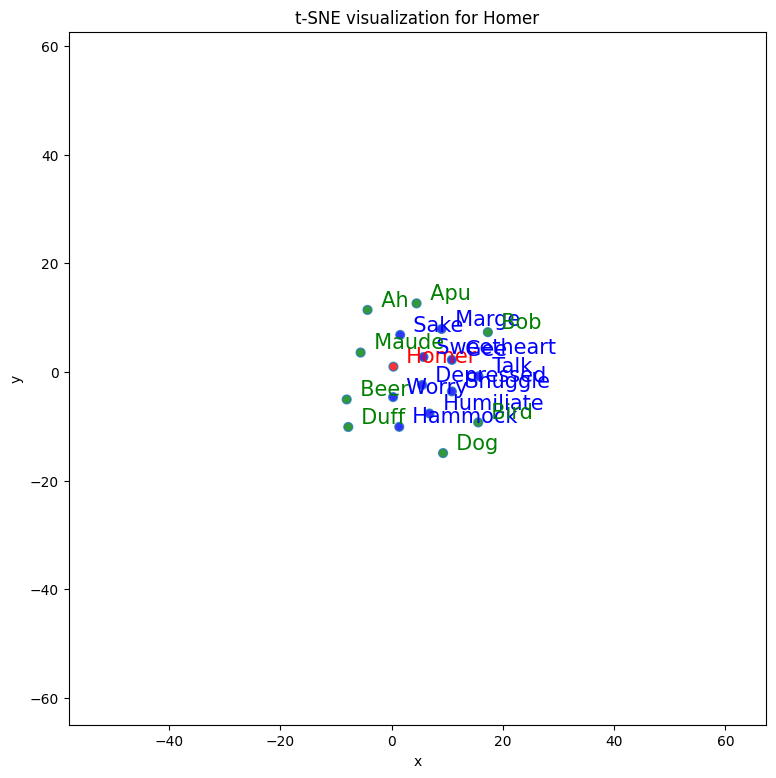

In [ ]:
# Let's compare where the vector representation of Homer, his 10 most similar words
# from the model, as well as 8 random ones, lies in a 2D graph:

tsnescatterplot(w2v_model, 'homer', ['dog', 'bird', 'ah', 'maude', 'bob', 'beer', 'apu', 'duff'])

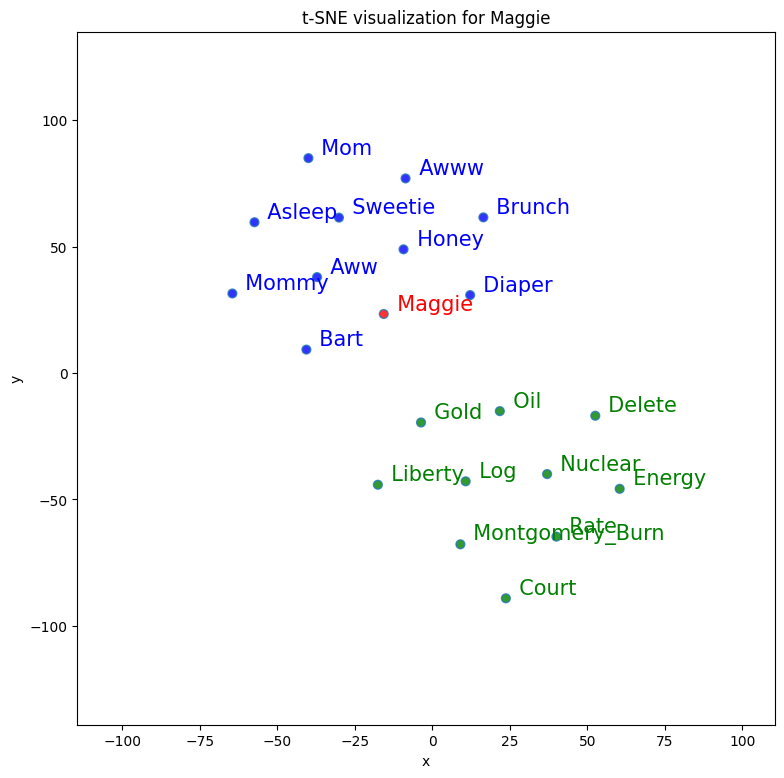

In [ ]:
word = 'maggie'

tsnescatterplot(
    w2v_model,
    word,
    [i[0] for i in w2v_model.wv.most_similar(negative=[word])],
    )